In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



# Bước 1: Import data



In [67]:
df = pd.read_csv('churn.csv')

In [68]:
df = df.drop(columns= ['RowNumber','CustomerId','Surname'], axis=1)

In [69]:
ohe = OneHotEncoder()
df_one_array = ohe.fit_transform(df[['Geography', 'Gender']]).toarray()
df_one = pd.DataFrame(df_one_array, columns = ohe.get_feature_names_out())
df.drop(['Geography', 'Gender'], axis = 1, inplace = True)
df = pd.concat([df, df_one], axis = 1)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [70]:

#Chia tập train, test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [71]:
# Option 1: Remove outliers
Q1 = df_train['Age'].quantile(0.25)
Q3 = df_train['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_train = df_train[(df_train['Age'] >= lower_bound) & (df_train['Age'] <= upper_bound)]
df_train


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,1.0,0.0,0.0,0.0,1.0
1561,632,42,4,119624.60,2,1,1,195978.86,0,0.0,1.0,0.0,0.0,1.0
1670,559,24,3,114739.92,1,1,0,85891.02,1,0.0,0.0,1.0,0.0,1.0
6087,561,27,9,135637.00,1,1,0,153080.40,1,1.0,0.0,0.0,1.0,0.0
6669,517,56,9,142147.32,1,0,0,39488.04,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,1.0,0.0,0.0,0.0,1.0
5191,682,58,1,0.00,1,1,1,706.50,0,1.0,0.0,0.0,1.0,0.0
5390,735,38,1,0.00,3,0,0,92220.12,1,1.0,0.0,0.0,1.0,0.0
860,667,43,8,190227.46,1,1,0,97508.04,1,1.0,0.0,0.0,0.0,1.0


## Feature engineering

Ông xem xử lý outlier thế nào nhé tôi ko thạo


In [72]:
# df.to_csv('cleaned_data_baber.csv', index=False)

In [73]:
x_train = df_train.drop(['Exited'], axis = 1)
y_train = df_train['Exited']
x_test = df_test.drop(['Exited'], axis = 1)
y_test = df_test['Exited']

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

dict = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Model tuning: nói rõ các tham số cần tìm, cách thực hiện
grid = GridSearchCV(RandomForestClassifier(), dict, cv = 5)
grid.fit(x_train, y_train)
print(grid.best_params_)
grid_params = grid.best_params_

{'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 30}


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



<Axes: >

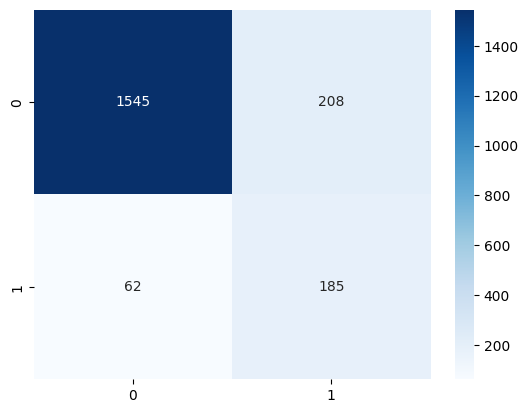

In [75]:
rf_grid = RandomForestClassifier(max_depth = grid_params['max_depth'], min_samples_leaf = grid_params['min_samples_leaf'], min_samples_split = grid_params['min_samples_split'], n_estimators = grid_params['n_estimators'])
rf_grid.fit(x_train, y_train)
y_pred = rf_grid.predict(x_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_pred, y_test)
sns.heatmap(cf, annot = True, cmap = 'Blues', fmt = 'g')


In [78]:
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

# Apply SMOTE to balance the data
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Train CatBoost model using the balanced data
catboost = CatBoostClassifier(iterations=100, depth=grid_params['max_depth'], learning_rate=0.1, verbose=0)
catboost.fit(x_train_smote, y_train_smote)
y_pred = catboost.predict(x_test)
print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'catboost'